Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии. \\
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков. \\
С использованием метода train_test_split разделите выборку на обучающую и тестовую. \\
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик. \\
Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации. \\
Сравните метрики качества исходной и оптимальной моделей.

In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
sns.set(style="ticks")

In [3]:
diabetes = datasets.load_wine()

In [4]:
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
data.target.unique()

array([0., 1., 2.])

In [4]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [5]:
dia_X_train, dia_X_test, dia_y_train, dia_y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.5, random_state=1)

In [6]:
# В моделях k-ближайших соседей большое значение k
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(dia_X_train, dia_y_train)
target1_0 = cl1_1.predict(dia_X_train)
target1_1 = cl1_1.predict(dia_X_test)
accuracy_score(dia_y_train, target1_0), accuracy_score(dia_y_test, target1_1)

(0.6629213483146067, 0.6067415730337079)

In [7]:
# 5 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(dia_X_train, dia_y_train)
target1_0 = cl1_2.predict(dia_X_train)
target1_1 = cl1_2.predict(dia_X_test)
accuracy_score(dia_y_train, target1_0), accuracy_score(dia_y_test, target1_1)

(0.8426966292134831, 0.7078651685393258)

In [8]:
# 1 ближайший сосед - "условное" переобучение
cl1_2 = KNeighborsClassifier(n_neighbors=1)
cl1_2.fit(dia_X_train, dia_y_train)
target1_0 = cl1_2.predict(dia_X_train)
target1_1 = cl1_2.predict(dia_X_test)
accuracy_score(dia_y_train, target1_0), accuracy_score(dia_y_test, target1_1)

(1.0, 0.6966292134831461)

In [15]:
# 3 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=3)
cl1_2.fit(dia_X_train, dia_y_train)
target1_0 = cl1_2.predict(dia_X_train)
target1_1 = cl1_2.predict(dia_X_test)
accuracy_score(dia_y_train, target1_0), accuracy_score(dia_y_test, target1_1)

(0.8764044943820225, 0.6966292134831461)

In [17]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         diabetes.data, diabetes.target, cv=3)

In [18]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.56666667, 0.6440678 , 0.72881356])

In [19]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.6465160075329566

In [20]:
# использование метрики f1
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         diabetes.data, diabetes.target, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.51069094, 0.6198816 , 0.6798559 ]), 0.6034761483135361)

In [23]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        diabetes.data, diabetes.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00290513, 0.00192547, 0.00100017]),
 'score_time': array([0.03370786, 0.0365231 , 0.0257175 ]),
 'test_precision': array([0.48984127, 0.62317561, 0.70585516]),
 'train_precision': array([0.91000807, 0.8877454 , 0.85825075]),
 'test_recall': array([0.56666667, 0.6440678 , 0.72881356]),
 'train_recall': array([0.89830508, 0.87394958, 0.83193277]),
 'test_f1': array([0.51069094, 0.6198816 , 0.6798559 ]),
 'train_f1': array([0.89415947, 0.8703245 , 0.8181316 ])}

In [24]:
# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [25]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [27]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         diabetes.data, diabetes.target, scoring='f1_weighted', 
                         cv=kf)
scores

array([0.92537313, 0.86969697, 0.77966102, 0.65924812, 0.        ])

In [28]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        diabetes.data, diabetes.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

C:\Users\olgap\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgap\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgap\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgap\AppData\Roaming\Python\Python311\site-packages

{'fit_time': array([0.00400019, 0.00300932, 0.00204563, 0.00300193, 0.00199986]),
 'score_time': array([0.04207444, 0.02011013, 0.02510786, 0.02311587, 0.02271938]),
 'test_precision': array([1.        , 0.90939153, 1.        , 0.69659864, 0.        ]),
 'train_precision': array([0.87898859, 0.89700325, 0.89859407, 0.87809081, 0.90796956]),
 'test_recall': array([0.86111111, 0.83333333, 0.63888889, 0.68571429, 0.        ]),
 'train_recall': array([0.85915493, 0.88028169, 0.88028169, 0.86013986, 0.9020979 ]),
 'test_f1': array([0.92537313, 0.86969697, 0.77966102, 0.65924812, 0.        ]),
 'train_f1': array([0.85579923, 0.87555637, 0.87794358, 0.85195658, 0.89135438])}

In [29]:
X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeavePOut(2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 2  3  4  5  6  7  8  9 10 11] [0 1]
[ 1  3  4  5  6  7  8  9 10 11] [0 2]
[ 1  2  4  5  6  7  8  9 10 11] [0 3]
[ 1  2  3  5  6  7  8  9 10 11] [0 4]
[ 1  2  3  4  6  7  8  9 10 11] [0 5]
[ 1  2  3  4  5  7  8  9 10 11] [0 6]
[ 1  2  3  4  5  6  8  9 10 11] [0 7]
[ 1  2  3  4  5  6  7  9 10 11] [0 8]
[ 1  2  3  4  5  6  7  8 10 11] [0 9]
[ 1  2  3  4  5  6  7  8  9 11] [ 0 10]
[ 1  2  3  4  5  6  7  8  9 10] [ 0 11]
[ 0  3  4  5  6  7  8  9 10 11] [1 2]
[ 0  2  4  5  6  7  8  9 10 11] [1 3]
[ 0  2  3  5  6  7  8  9 10 11] [1 4]
[ 0  2  3  4  6  7  8  9 10 11] [1 5]
[ 0  2  3  4  5  7  8  9 10 11] [1 6]
[ 0  2  3  4  5  6  8  9 10 11] [1 7]
[ 0  2  3  4  5  6  7  9 10 11] [1 8]
[ 0  2  3  4  5  6  7  8 10 11] [1 9]
[ 0  2  3  4  5  6  7  8  9 11] [ 1 10]
[ 0  2  3  4  5  6  7  8  9 10] [ 1 11]
[ 0  1  4  5  6  7  8  9 10 11] [2 3]
[ 0  1  3  5  6  7  8  9 10 11] [2 4]
[ 0  1  3  4  6  7  8  9 10 11] [2 5]
[ 0  1  3  4  5  7  8  9 10 11] [2 6]
[ 0  1  3  4  5  6  8  9 10 11] [2 7]
[ 0 

In [31]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]


In [32]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(dia_X_train, dia_y_train)

CPU times: total: 688 ms
Wall time: 441 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [33]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00100856, 0.00097394, 0.00200152, 0.0017055 , 0.00205312,
        0.00201058, 0.00109797, 0.00121508, 0.0014019 , 0.0014111 ]),
 'std_fit_time': array([0.0004381 , 0.0005878 , 0.0006346 , 0.00108096, 0.00010928,
        0.00027626, 0.00020507, 0.000397  , 0.00048902, 0.00048155]),
 'mean_score_time': array([0.00462008, 0.00423083, 0.00717201, 0.00639982, 0.00632248,
        0.0074141 , 0.0062315 , 0.00716047, 0.00734105, 0.0064919 ]),
 'std_score_time': array([0.00119369, 0.00120189, 0.00166325, 0.00119994, 0.00063739,
        0.00182081, 0.0004196 , 0.00047461, 0.00041277, 0.00060475]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [34]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [35]:
# Лучшее значение метрики
clf_gs.best_score_

0.7189542483660132

In [36]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 15}

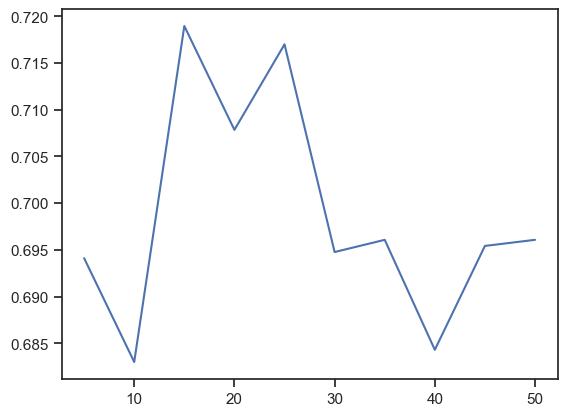

In [37]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [39]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(dia_X_train, dia_y_train)

CPU times: total: 625 ms
Wall time: 499 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [40]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.7189542483660132, {'n_neighbors': 15})

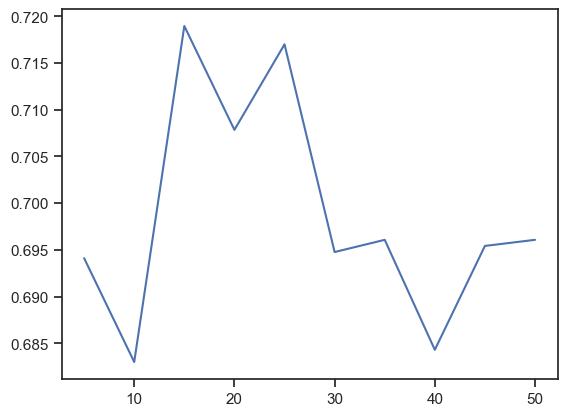

In [42]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])